## <span style="color:orange">Techniques: </span>
- Decision tree
- Random Forest tree
- Gaussian Naive Bayes
- Logistic Regression

### <span style="color:purple">Dataset: **Loan Deserving Prediction** !</span>

### <span style="color:red">Problem: Classification</span>

### <span style="color:cyan">Step: 01</span>: (Import Dataset)

In [258]:
# import Libraries !

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [259]:
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [260]:
df.shape

(614, 13)

 ### **Missing Values**

In [261]:
for feature in df:
    if df[feature].isnull().sum()>1:
        print(feature,":", np.round(df[feature].isnull().mean(),4),'%')
    
else:
     print("There is no Null Values")

Gender : 0.0212 %
Married : 0.0049 %
Dependents : 0.0244 %
Self_Employed : 0.0521 %
LoanAmount : 0.0358 %
Loan_Amount_Term : 0.0228 %
Credit_History : 0.0814 %
There is no Null Values


In [262]:
df = df.drop(['Loan_ID', 'Credit_History'], axis=1)

In [263]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Property_Area         0
Loan_Status           0
dtype: int64

 ### **Numerical Features** 

In [264]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print("The Numerical_values is :",len(numerical_features))
numerical_features
df[numerical_features].head()

The Numerical_values is : 4


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,NaN,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0


 ### **Discrete Variable** 

In [265]:
discrete_Feature = [feature for feature in numerical_features if len(df[feature].unique())<25]

print("The Discrete feature is :",len(discrete_Feature))
discrete_Feature
df[discrete_Feature].head()

The Discrete feature is : 1


,Loan_Amount_Term
0,360.0
1,360.0
2,360.0
3,360.0
4,360.0


 ### **Continous Variable** 

In [266]:
continous_Feature = [feature for feature in numerical_features if feature not in discrete_Feature]

print("The Continous feature is :",len(continous_Feature))
continous_Feature
df[continous_Feature].head()

The Continous feature is : 3


,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,NaN
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0


  ### **Categorical feature** 

In [267]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes =="O"]

print(len(categorical_feature))
categorical_feature
df[categorical_feature].head()

7


,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


### <span style="color:cyan">Step: 02</span>: Data Normalize

In [268]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [269]:
df['Loan_Status'] = df['Loan_Status'].replace('Y', 'Yes') 
df['Loan_Status'] = df['Loan_Status'].replace('N', 'No') 

In [270]:
df['Loan_Status'].unique()

array(['Yes', 'No'], dtype=object)

In [271]:
df['LoanAmount'] = df['LoanAmount'].replace(np.nan, df.LoanAmount.mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].replace(np.nan, df.Loan_Amount_Term.mean())

In [272]:
df['Dependents'] = df['Dependents'].replace('3+', 3)

In [273]:
df.dropna(subset=['Gender', 'Self_Employed', 'Dependents'], axis=0, inplace=True)

In [274]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Property_Area        0
Loan_Status          0
dtype: int64

In [275]:
df.shape

(554, 11)

#### Encoding

In [276]:
# encode the catagorical variables !
le = LabelEncoder()

feature = [i for i in df if i in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']]
for i in feature :
    df[i]= le.fit_transform(df[i])

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,2,Yes
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,0,No
2,1,1,0,0,1,3000,0.0,66.000000,360.0,2,Yes
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,2,Yes
4,1,0,0,0,0,6000,0.0,141.000000,360.0,2,Yes


#### Min-Max Scaling

In [277]:
# transformation !
scaler = MinMaxScaler()

# feature_scale = [feature for feature in df.columns if feature not in ['Loan_Status']]
feature_scale = [feature for feature in df.columns if feature in ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Property_Area']]
df[feature_scale] = scaler.fit_transform(df[feature_scale])

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
0,1,0,0.000000,0,0,0.070489,0.000000,0.214372,0.74359,1.0,Yes
1,1,1,0.333333,0,0,0.054830,0.044567,0.185647,0.74359,0.0,No
2,1,1,0.000000,0,1,0.035250,0.000000,0.088924,0.74359,1.0,Yes
3,1,1,0.000000,1,0,0.030093,0.069687,0.173167,0.74359,1.0,Yes
4,1,0,0.000000,0,0,0.072356,0.000000,0.205928,0.74359,1.0,Yes


### <span style="color:cyan">Step: 03</span>: Data Cleaned or Organize

In [278]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Property_Area        0
Loan_Status          0
dtype: int64

***

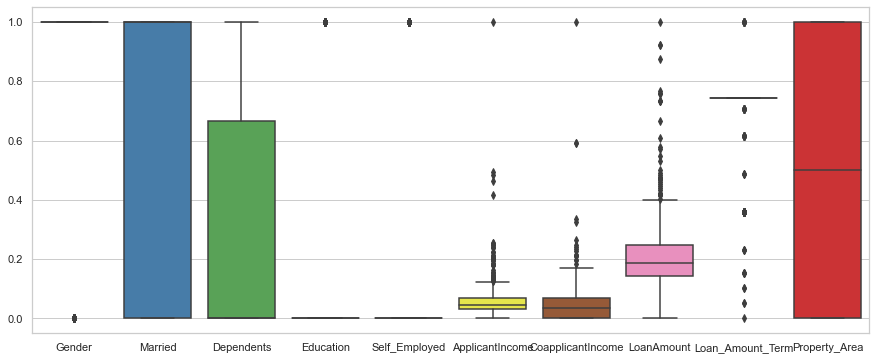

In [279]:
plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            palette="Set1")
plt.show()            

In [280]:
print("Shape:", df.shape)

Shape: (554, 11)


***

In [281]:
X = df.drop('Loan_Status', axis=1)
y = df[['Loan_Status']]

In [282]:
X.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area
0,1,0,0.000000,0,0,0.070489,0.000000,0.214372,0.74359,1.0
1,1,1,0.333333,0,0,0.054830,0.044567,0.185647,0.74359,0.0


In [283]:
y.head(2)

,Loan_Status
0,Yes
1,No


 ## **Model Building**

### <span style="color:cyan">Step: 04</span>: Splitting Dataset into (Training and Testing) Data 

In [284]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

***

### <span style="color:cyan">Step: 05</span>: Techniques !

## Decision tree !

In [285]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier().fit(X_train, y_train)
dt_model


DecisionTreeClassifier()

### Evaluate or Test Model Accuracy

In [286]:
predicted_values = dt_model.predict(X_test)
predicted_values

from sklearn.metrics import accuracy_score

import numpy as np

dt_score = np.round(accuracy_score(y_test, predicted_values)*100, 2)
print("Decision tree:",dt_score)


Decision tree: 64.86


***

***

## Random Forest tree !

In [287]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_model


C:\Users\fahad\AppData\Local\Temp\ipykernel_3588\4111477682.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = RandomForestClassifier().fit(X_train, y_train)


RandomForestClassifier()

### Evaluate or Test Model Accuracy

In [288]:
predicted_values = rf_model.predict(X_test)
predicted_values

from sklearn.metrics import accuracy_score

import numpy as np

rf_score = np.round(accuracy_score(y_test, predicted_values)*100, 2)
print("Random Forest:", rf_score)


Random Forest: 68.47


***

***

## Gaussian Naive Bayes !

In [289]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB().fit(X_train, y_train)
gnb_model


C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

### Evaluate or Test Model Accuracy

In [290]:
predicted_values = gnb_model.predict(X_test)
predicted_values

from sklearn.metrics import accuracy_score

import numpy as np

gnb_score = np.round(accuracy_score(y_test, predicted_values)*100, 2)
print("GaussianNB:", gnb_score)


GaussianNB: 70.27


***

***

### <span style="color:cyan">Step: 05</span>: Fit Logistic Regression !

In [291]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression().fit(X_train, y_train)
lr_model


C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

### <span style="color:cyan">Step: 06</span>: Evaluate or Test Model Accuracy

In [292]:
import numpy as np

lr_score = np.round(lr_model.score(X_test, y_test)*100, 2)
print("Logistic Regression:", lr_score)


Logistic Regression: 72.07


***

***

In [293]:
data={'Decesion Tree'            :[dt_score],
      'Random Forest'            :[rf_score],
      'Gaussian Naive Bayes'     :[gnb_score],
      'Logistic Regression'      :[lr_score]
}

In [294]:
Evaluation =pd.DataFrame(data, index=['Score'])
Evaluation

,Decesion Tree,Random Forest,Gaussian Naive Bayes,Logistic Regression
Score,64.86,68.47,70.27,72.07


***

***